In [42]:
import random
import numpy as np
import matplotlib.pyplot as graph
import seaborn as sns
import scipy.stats as stats
import scipy.optimize as opt
import pomegranate as pm
from tqdm import tqdm

import itertools

graph.style.use('fivethirtyeight')

# Distributions

### Poisson and Binomial

In [43]:
poisson = np.random.poisson(15, size=int(1e7))
binomial = np.random.binomial(30, 0.5, size=int(1e7))

/home/arshad/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


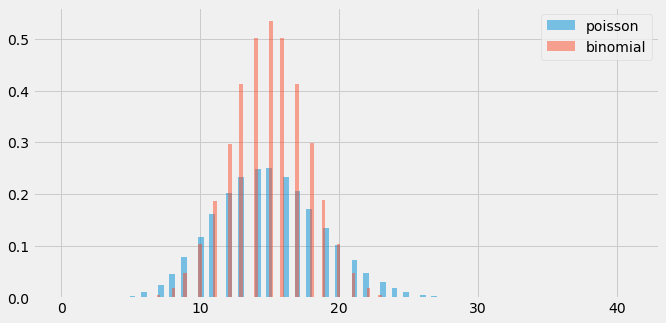

In [44]:
graph.figure(figsize=(10, 5))
graph.hist(poisson, bins=100, alpha=0.5, label='poisson', normed=True)
graph.hist(binomial, bins=100, alpha=0.5, label='binomial', normed=True)
graph.legend()
graph.show()

/home/arshad/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


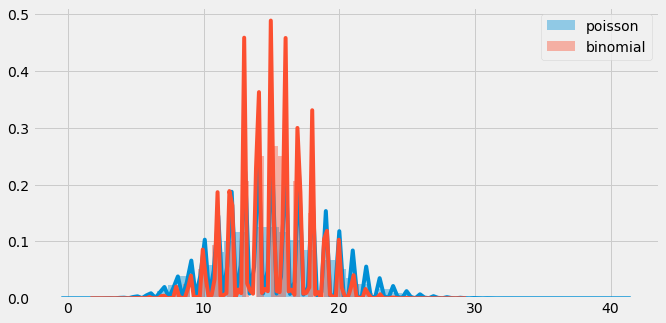

In [45]:
graph.figure(figsize=(10, 5))
sns.distplot(poisson, label='poisson', norm_hist=True)
sns.distplot(binomial, label='binomial', norm_hist=True)
graph.legend()
graph.show()

### Uniform and Normal

In [46]:
n = int(1e4)
s = 3

x_uni = np.random.uniform(-1, 10, size=n)
x_norm = np.random.normal(5, 5, size=n)

In [47]:
y_uni = (1.5 * x_uni) + 2 + stats.norm(0, s).rvs(size=n)
y_norm = (1.5 * x_norm) + 2 + stats.norm(0, s).rvs(size=n)

/home/arshad/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


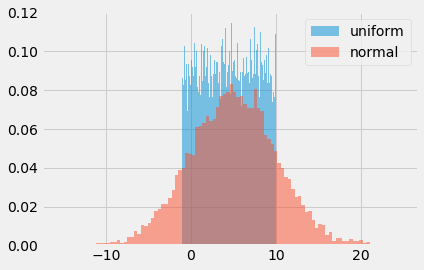

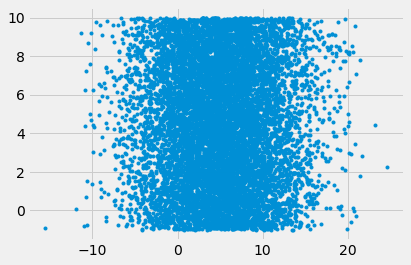

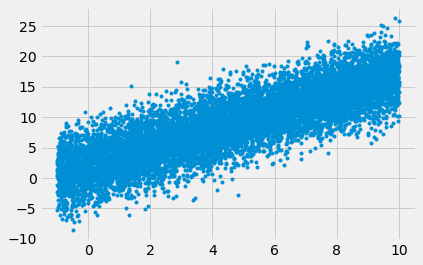

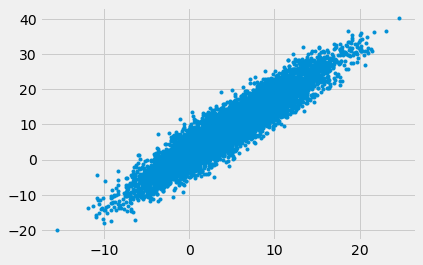

In [48]:
graph.hist(x_uni, bins=100, alpha=0.5, label='uniform', normed=True)
graph.hist(x_norm, bins=100, alpha=0.5, label='normal', normed=True)
graph.legend()
graph.show()

graph.plot(x_norm, x_uni, '.')
graph.show()

graph.plot(x_uni, y_uni, '.')
graph.show()

graph.plot(x_norm, y_norm, '.')
graph.show()

### Gamma  and inverse gamma distributions

100%|██████████| 10/10 [00:00<00:00, 10.19it/s]


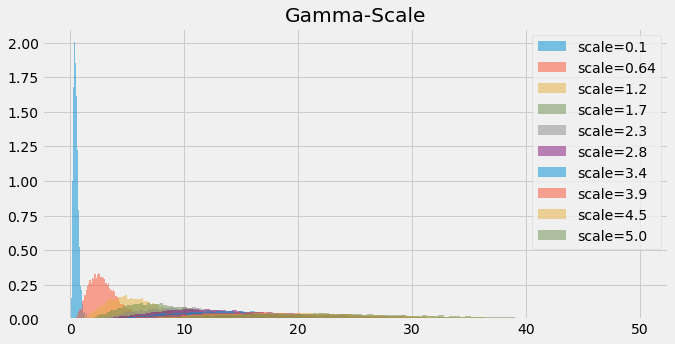

100%|██████████| 10/10 [00:00<00:00, 78.39it/s]


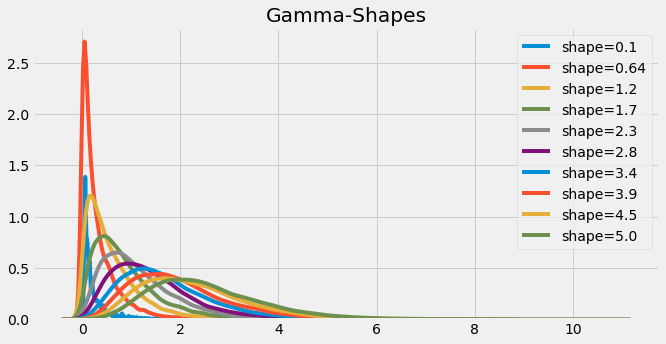

In [50]:
scale_params = np.linspace(0.1, 5, num=10)
shape_params = np.linspace(0.1, 5, num=10)
n = int(1e4)

graph.figure(figsize=(10, 5))
    
for scale in tqdm(scale_params, total=len(scale_params)):
    x_gamma = np.random.gamma(5, scale=scale.round(1), size=n)
    graph.hist(x_gamma[x_gamma < 50], bins=100, alpha=0.5, label=f'scale={scale:.2}', density=True)
    graph.legend()
graph.title('Gamma-Scale')
graph.show()

graph.figure(figsize=(10, 5))

for shape in tqdm(shape_params, total=len(shape_params)):
    x_gamma = np.random.gamma(shape=shape, scale=0.5, size=n)
    sns.distplot(x_gamma, hist=False, label=f'shape={shape:.2}', norm_hist=True)
    graph.legend()
graph.title('Gamma-Shapes')
graph.show()

100%|██████████| 3/3 [00:00<00:00,  5.29it/s]


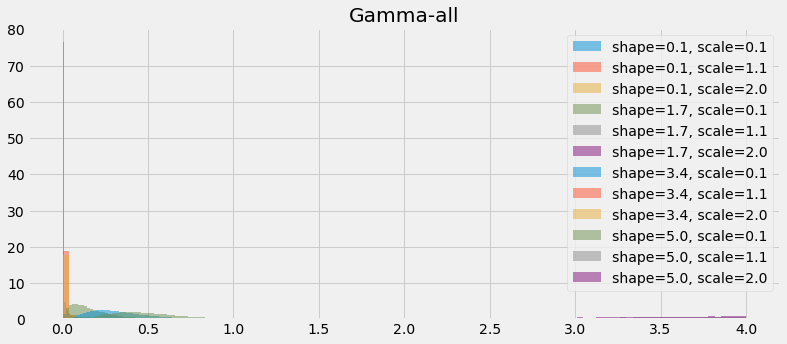

In [51]:
shape_params = np.linspace(0.1, 5, num=4)
scale_params = np.linspace(0.1, 2, num=3)
n = int(1e6)

graph.figure(figsize=(12, 5))

for shape in shape_params:
    for scale in tqdm(scale_params, total=len(scale_params)):
        x_gamma = np.random.gamma(shape=shape, scale=scale, size=n)
        graph.hist(x_gamma[x_gamma < 4], bins=100, alpha=0.5, 
                   label=f'shape={shape:.2}, scale={scale:.2}', density=True)
        graph.legend()
graph.title('Gamma-all')
graph.show()

100%|██████████| 3/3 [00:00<00:00,  3.20it/s]


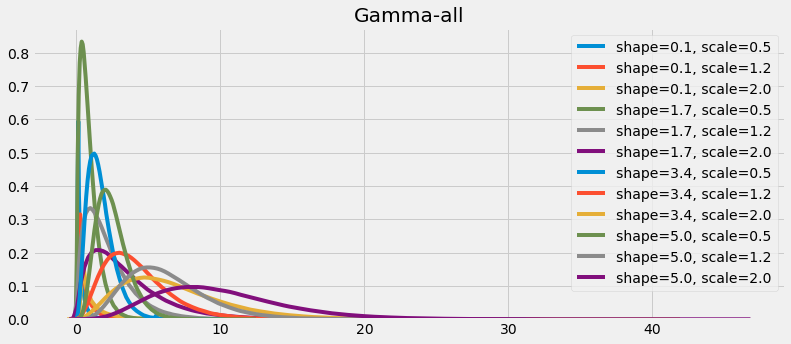

In [52]:
shape_params = np.linspace(0.1, 5, num=4)
scale_params = np.linspace(0.5, 2, num=3)
n = int(1e6)

graph.figure(figsize=(12, 5))

for shape in shape_params:
    for scale in tqdm(scale_params, total=len(scale_params)):
        x_gamma = np.random.gamma(shape=shape, scale=scale, size=n)
        sns.distplot(x_gamma, hist=False, label=f'shape={shape:.2}, scale={scale:.2}', norm_hist=True)
        graph.legend()
graph.title('Gamma-all')
graph.show()

/home/arshad/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


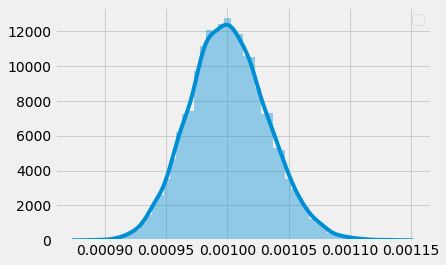

In [53]:
inverse_gamma_dist = stats.invgamma.rvs(1000, size=10000)
sns.distplot(inverse_gamma_dist, norm_hist=True)
graph.legend()
graph.show()

  0%|          | 0/7 [00:00<?, ?it/s]/home/arshad/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
100%|██████████| 7/7 [00:00<00:00, 13.95it/s]


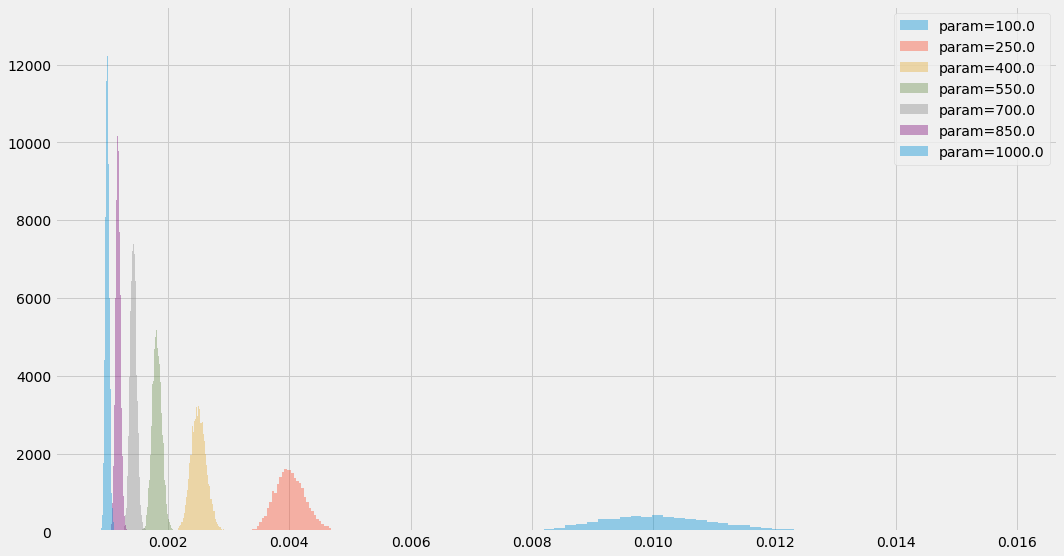

In [54]:
inverse_gamma_param = np.linspace(100, 1000, 7)

graph.figure(figsize=(16, 9))
for param in tqdm(inverse_gamma_param, total=len(inverse_gamma_param)):
    inverse_gamma_dist = stats.invgamma.rvs(param, size=10000)
    sns.distplot(inverse_gamma_dist, kde=False, label=f'param={param}', norm_hist=True)
    graph.legend()
graph.show()

### Beta

In [55]:
beta = np.random.beta(2, 1, size=int(1e5))

100%|██████████| 3/3 [00:00<00:00,  3.49it/s]


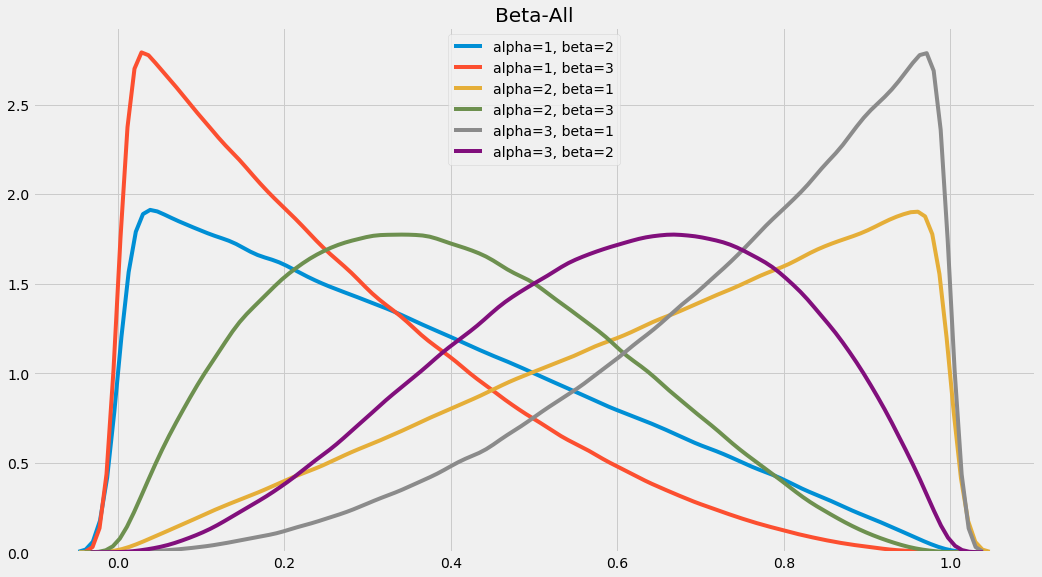

In [56]:
alpha_beta_distribution = np.arange(1, 4)
beta_beta_distribution = np.arange(1, 4)

graph.figure(figsize=(16, 9))

for alpha in alpha_beta_distribution:
    for beta in tqdm(beta_beta_distribution, total=len(beta_beta_distribution)):
        if alpha == beta:
            continue
        beta_distribution = np.random.beta(alpha, beta, size=int(1e6))
        sns.distplot(beta_distribution, hist=False, label=f'alpha={alpha}, beta={beta}', norm_hist=True)
        graph.legend()

graph.title('Beta-All')
graph.show()

100%|██████████| 19/19 [00:06<00:00,  3.03it/s]


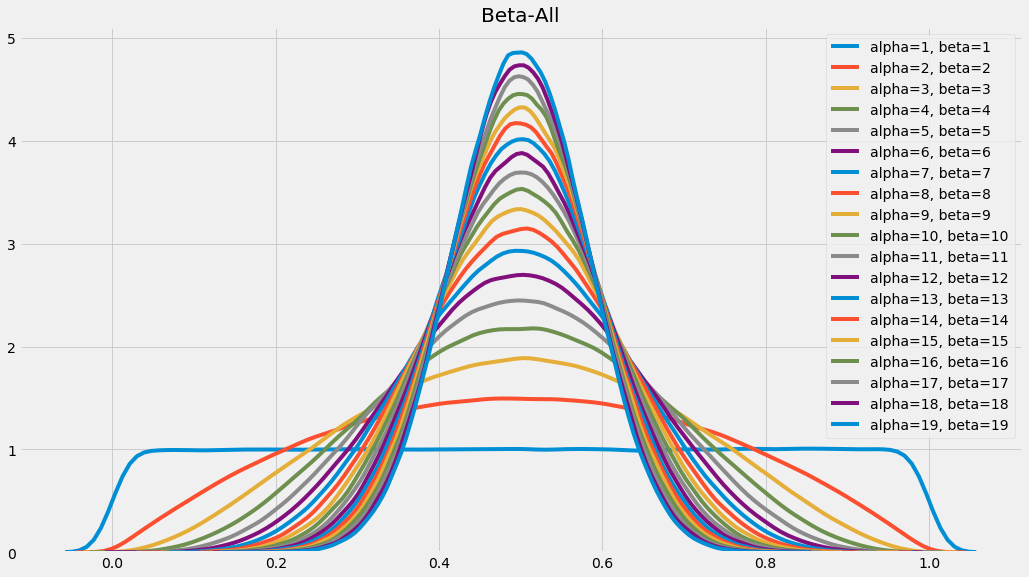

In [57]:
alpha_beta_distribution = np.arange(1, 20)

graph.figure(figsize=(16, 9))

for alpha, beta in tqdm(zip(alpha_beta_distribution, alpha_beta_distribution), total=len(alpha_beta_distribution)):
    beta_distribution = np.random.beta(alpha, beta, size=int(1e6))
    sns.distplot(beta_distribution, hist=False, label=f'alpha={alpha}, beta={beta}', norm_hist=True)
    graph.legend()

graph.title('Beta-All')
graph.show()

100%|██████████| 19/19 [00:08<00:00,  2.36it/s]


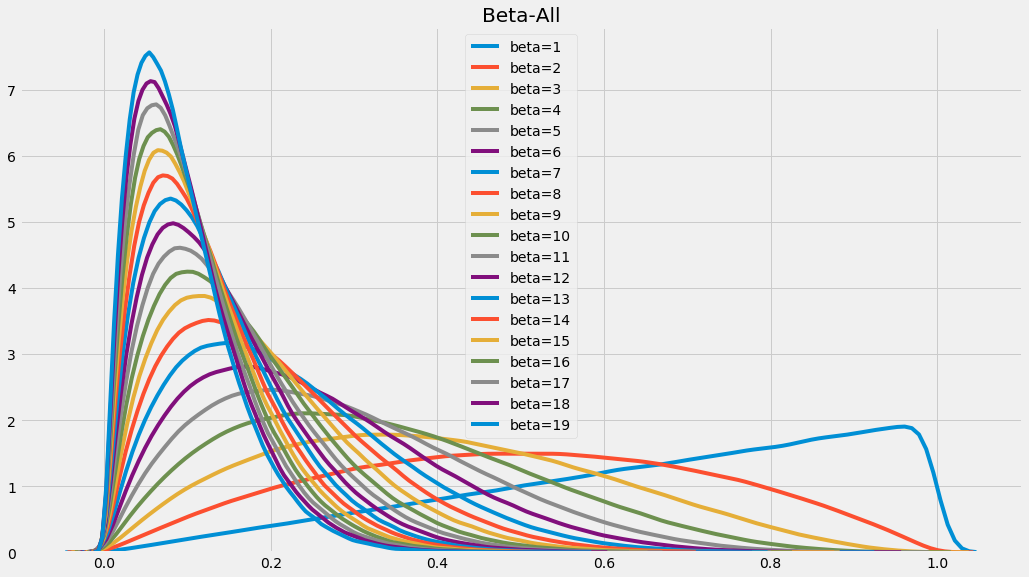

In [58]:
alpha_beta_distribution = np.arange(1, 20)

graph.figure(figsize=(16, 9))

for beta in tqdm(alpha_beta_distribution, total=len(alpha_beta_distribution)):
    beta_distribution = np.random.beta(2, beta, size=int(1e6))
    sns.distplot(beta_distribution, hist=False, label=f'beta={beta}', norm_hist=True)
    graph.legend()

graph.title('Beta-All')
graph.show()

### Exponential

100%|██████████| 9/9 [00:06<00:00,  1.38it/s]


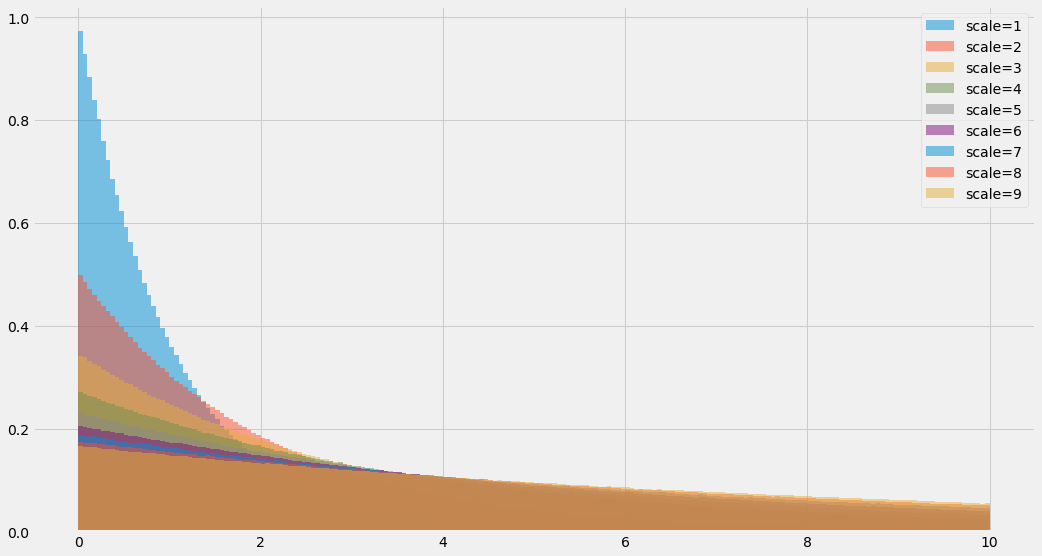

100%|██████████| 9/9 [00:26<00:00,  2.92s/it]


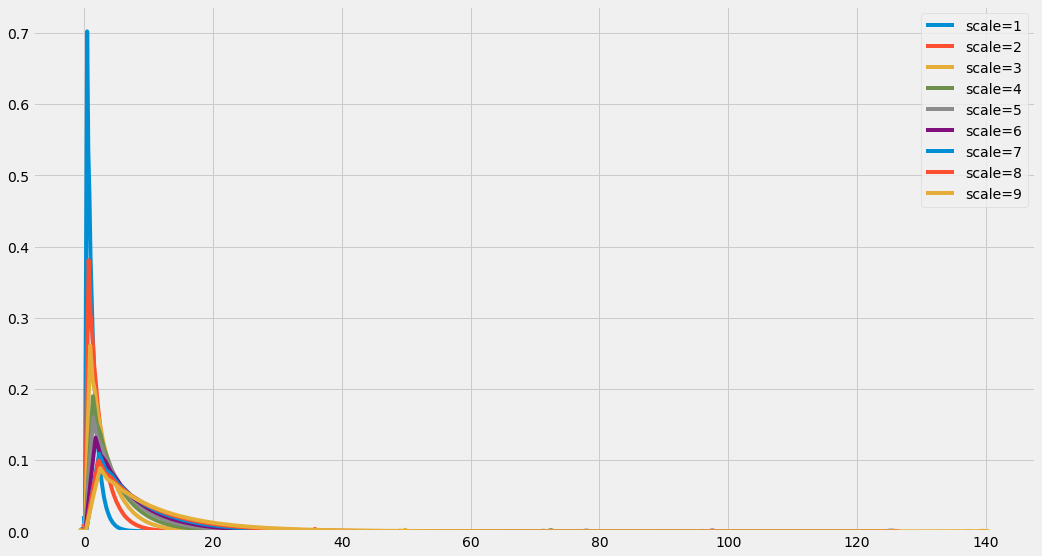

In [ ]:
exponential_scale = np.arange(1, 10, 1)

graph.figure(figsize=(16, 9))
for scale in tqdm(exponential_scale, total=len(exponential_scale)):
    exponential_dist = np.random.exponential(scale, int(1e7))
    graph.hist(exponential_dist[exponential_dist < 10], bins=200, alpha=0.5, density=True, 
               label=f'scale={scale}')
    graph.legend()
graph.show()

graph.figure(figsize=(16, 9))
for scale in tqdm(exponential_scale, total=len(exponential_scale)):
    exponential_dist = np.random.exponential(scale, int(1e7))
    sns.distplot(exponential_dist, hist=False, norm_hist=True, label=f'scale={scale}')
    graph.legend()
graph.show()

### Geometric

In [ ]:
geometric_ps = np.arange(0.1, 1, 0.2)

graph.figure(figsize=(16, 9))
for ps in tqdm(geometric_ps, total=len(geometric_ps)):
    geometric_dist = np.random.geometric(ps, int(1e7))
    sns.distplot(geometric_dist[geometric_dist < 40], norm_hist=True, hist=False, label=f'p={ps:.2}')
    graph.legend()
graph.show()

  0%|          | 0/5 [00:00<?, ?it/s]

### Chi-Square

  0%|          | 0/10 [00:00<?, ?it/s]/home/arshad/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
100%|██████████| 10/10 [00:00<00:00, 10.45it/s]


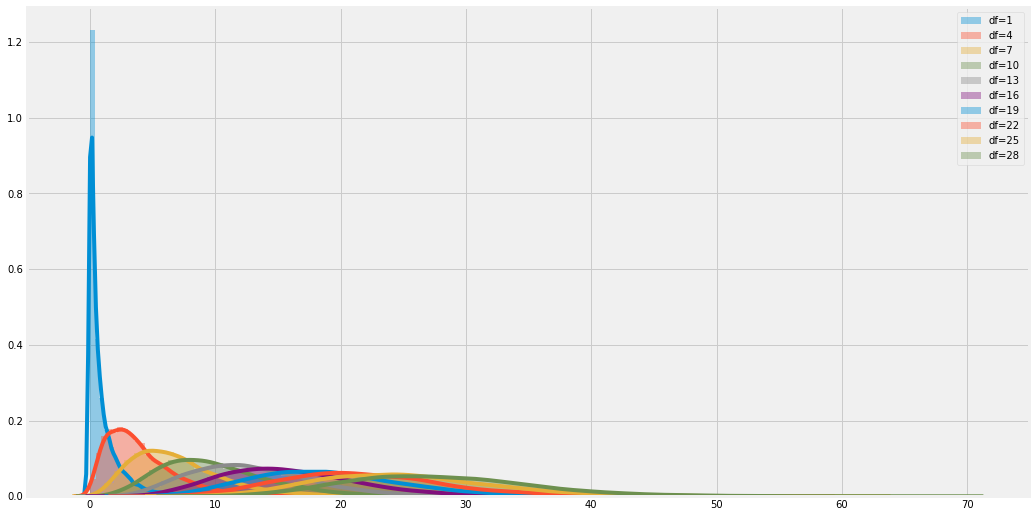

In [19]:
degrees_of_freedom = np.arange(1, 30, 3)

graph.figure(figsize=(16, 9))
for deg_f in tqdm(degrees_of_freedom, total=len(degrees_of_freedom)):
    chi_square_dist = np.random.chisquare(deg_f, size=int(1e4))
#     graph.hist(chi_square_dist, bins=50, density=True, label=f'df={deg_f}')
    sns.distplot(chi_square_dist, norm_hist=True, label=f'df={deg_f}')
    graph.legend()
graph.show()

100%|██████████| 12/12 [00:02<00:00,  4.94it/s]


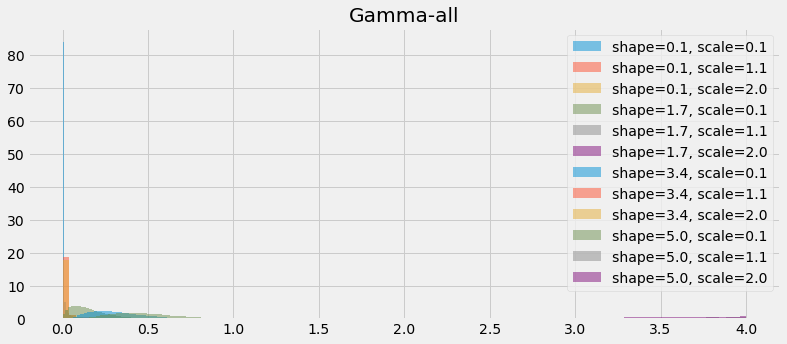

In [33]:
shape_params = np.linspace(0.1, 5, num=4)
scale_params = np.linspace(0.1, 2, num=3)
n = int(1e6)

graph.figure(figsize=(12, 5))

for shape, scale in tqdm(itertools.product(shape_params, scale_params), total=len(shape_params)*len(scale_params)):
    x_gamma = np.random.gamma(shape=shape, scale=scale, size=n)
    graph.hist(x_gamma[x_gamma < 4], bins=100, alpha=0.5, 
               label=f'shape={shape:.2}, scale={scale:.2}', density=True)
    graph.legend()
graph.title('Gamma-all')
graph.show()

In [32]:
shape_params = np.linspace(0.1, 5, num=4)
scale_params = np.linspace(0.1, 2, num=4)

print(shape_params)
print(scale_params)
print(shape_params * scale_params)

[0.1        1.73333333 3.36666667 5.        ]
[0.1        0.73333333 1.36666667 2.        ]
[ 0.01        1.27111111  4.60111111 10.        ]


In [41]:
10 * np.log10(0.0125)

-19.030899869919434